## Homework 4

### Saanvi Nandanwar 

Instructions: 
1. Replace "yourname" in the filename of this notebook, and "your name here" in this header, with your name.
2. Complete all questions/problems. **Make sure to run all cells so that your output is visible.**
3. Run "restart & run all" from the Kernel menu, to make sure that it's all running in order.
4. Email me your notebook (.ipynb file) to jonathan.reeve@columbia.edu. Please don't email me archives (`.zip` or `.tar.gz`) or extra texts. Write the word "lobster" somewhere in your email, so that I know you read these instructions.

### 1. Install SpaCy and the SpaCy language model called `en_core_web_lg`.

It is important that you get this particular language model, as the others don't have the features we'll need.

You're welcome to work together in groups for this one (probably in groups where you all run the same operating system).

There are installation instructions here on the SpaCy website that list a number of command-line commands to run. To run command-line commands:

- Linux: open a terminal.
- MacOS: open the Terminal app. (Hint: you can open Spotlight, the magnifying glass icon in the upper right, and type "terminal")
- Windows: open Powershell. (Open the Start menu, then type "powershell.") Alternatively, download Git BASH, which is included in GitHub Desktop.

Whenever you see command-line commands, they're usually prefixed with `$` or `#.` A `$` means to run the command as a regular user, and a `#` means to prefix your command with `sudo`. You'll generally only see `$`, and you're already running as a regular user, so all you'll need to do is to type in the command that follows the `$`, i.e. not including the `$`. So if the command is shown in the SpaCy docs as `$ conda install -c conda-forge spacy`, open a terminal and type `conda install -c conda-forge spacy`, exactly as written.

When following the SpaCy instructions, you'll want to choose `conda` as your package manager (because you've installed Anaconda), and 'python3' as your Python version, since we're using Python 3 in this course. Don't select `virtualenv` unless you really know what you're doing.

To show that you've successfully installed this stack, please run the two cells below, to show that it's not giving you errors.

In [210]:
import spacy

In [211]:
nlp = spacy.load('en_core_web_lg')

**We're error free!**

### 2. Create the corpus that you'll use for your final project, and put it into a dictionary with labels as the keys.

Consult the final project instructions on choosing a corpus. Feel free to use corpus-db.org to assemble your corpus. If you need any help in using it, please ask in the chatroom! You can use it to get, say, 30 detective novels relatively easily, or 30 novels that feature young women, or 30 novels set in Paris. You can also get all the works by a certain author this way. But be careful to know exactly what texts you're getting. Project Gutenberg includes texts in a number of languages, so select your texts carefully.

If you have a directory of text files, you can easily load all the files in your directory with `glob`, using something like:
```python
{filename: open(filename).read() for filename in glob.glob('*.txt')}
```
Stick with English texts, please. NLP in other languages is possible, but requires a different set of tokenizers and other tools that we haven't used yet in this course. It's also good idea to work with texts that are originally written in English, since translations have the problem of introducing translator's word choices to the set of word choices that the author has already made.

Your corpus should be a collection of texts, stored in one variable. However, it doesn't have to be a collection of *works*. Rather, it can be all the narratives in *The Moonstone*, all of Katherine Mansfield's stories, all of Joyce's stories, or some combination of the above, based on theme or genre. It can also be all the novels of a certain writer, or of five writers. Comparisons make for good corpora. Why not compare, say, all of our Joyce stories to all of our Mansfield stories? You'll probably want to have more than four documents, and less than a thousand, for the analyses that follow.

You can also use certain APIs to get texts like book reviews. Use `requests.get` along with a URL you get from the API's documentation. Maybe you're interested in comparing texts and their reviews?

Your corpus might change a little by the time you finish your final project, and that's OK, but try not to change it completely, if you can.

Make sure to clean your corpus of paratext: tables of contents, Project Gutenberg copyright licenses, etc, since these will throw off text statistics.

Print out just enough of your corpus to show that it's well-structured, i.e., the first 100 characters of each text. Don't do this if you have 1000 texts, though—just print out a preview of it.

**Please don't print out the entire contents of your corpus, or include any of your text files in your homework.**

Finally, write a paragraph in Markdown where you describe your sources, and how you organized your corpus.

In [239]:
# Insert your code here.
garden = open('garden-party.md.txt').read()
gardenL = garden.lower()
gardenSplit = gardenL.split('# ')
at_the_bay = ''.join(gardenSplit[1:16])
garden_party = ''.join(gardenSplit[16])
daughters_colonel = ''.join(gardenSplit[17:30])

stories = {"At the Bay": at_the_bay, "Garden Party": garden_party, "The Daughters of the Late Colonel": daughters_colonel}

titles = ['Mr. and Mrs. Dove', 'The Young Girl', 'Life of Ma Parker', 'Marriage a la Mode', 'The Voyage', 'Miss Brill', 'Her First Ball', 
          'The Singing Lesson', 'The Stranger', 'Bank Holiday', 'An Ideal Family', 'The Lady’s Maid']
stories2 = {title: text for title, text in zip(titles, gardenSplit[30:43])}

stories.update(stories2)

for title in stories: 
    print(stories[title][:100])
    print("")


1. at the bay.
#chapter 1.i.

very early morning. the sun was not yet risen, and the whole of cresce

2. the garden party.

and after all the weather was ideal. they could not have had a more
perfect da

3. the daughters of the late colonel.

#chapter 3.i.

the week after was one of the busiest weeks of

4. mr. and mrs. dove.

of course he knew---no man better---that he hadn't a ghost of a chance,
he ha

5. the young girl.

in her blue dress, with her cheeks lightly flushed, her blue, blue eyes,
and her

6. life of ma parker.

when the literary gentleman, whose flat old ma parker cleaned every
tuesday, 

7. marriage a la mode.

on his way to the station william remembered with a fresh pang of
disappoint

8. the voyage.

the picton boat was due to leave at half-past eleven. it was a beautiful
night, mild

9. miss brill.

although it was so brilliantly fine---the blue sky powdered with gold
and great spot

10. her first ball.

exactly when the ball began leila would have found it hard to

**MY ANSWER:** In the previous homework assignment, I said that I wanted to compare the novel *The Moonstone* with its play adaptation, but I think I would actually be more interested in comparing the differences between the short stories from *The Garden Party*. I was thinking of comparing all of the short stories from this collection, even though there are a couple that I have not yet read. I think that it would be interesting to compare them stylistically and see if there are drastic differences between the stories, as they are all written by the same author. I was thinking of taking this idea a few steps further by also seeing if there is a correlation between the different styles of the texts and the frequencies of colors, flowers, and male/female pronouns. My thought process currently is that the short stories with female main characters will be grouped together and that they will also have higher frequencies of color and flower words, compared to the couple short stories that do not. That is why I have printed out the first one hundred characters of each short story in *The Garden Party*. 

### 3. Calculate the length, in words, of each text in your corpus. Make a chart that shows how they compare.
Then, in a markdown cell, write about how these different lengths may affect your analysis, and how you might counteract the effects of different text lengths.

<AxesSubplot:>

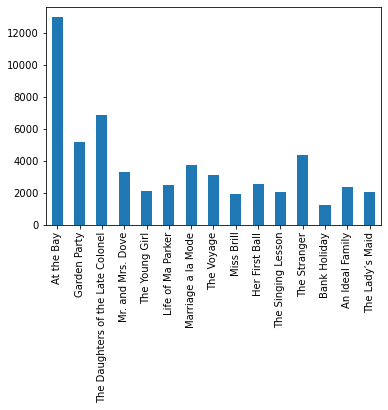

In [240]:
# Insert your code here.
import pandas as pd 
import nltk

lengths = []
alpha_tokens = []  #has the words (no punctuation) for each story as lists stored in a list
for story in stories: 
    stories[story] = nltk.word_tokenize(stories[story])
    words = []
    for token in stories[story]:
        if token.isalpha():
            words.append(token)
    lengths.append(len(words))
    alpha_tokens.append(words)

titles = ["At the Bay", "Garden Party", "The Daughters of the Late Colonel", 'Mr. and Mrs. Dove', 'The Young Girl', 'Life of Ma Parker', 
          'Marriage a la Mode', 'The Voyage', 'Miss Brill', 'Her First Ball', 'The Singing Lesson', 'The Stranger', 'Bank Holiday', 
          'An Ideal Family', 'The Lady’s Maid']

combined = {title: text for title, text in zip(titles, lengths)}

pd.Series(combined).plot(kind='bar')

**MY ANSWER:** Althought there are a couple stories that seem to be a bit longer and the first story that is much longer than all the other ones, for the most part the stories in this collection seem to average at about a similar length, with maybe a five hundred token delta. However, these various lengths would make it difficult to get an accurate representation of the type-token ratio for each of the texts. That is why I think for the next question (or other similar questions), it would be a good idea to truncate the texts so that they all have the same number of tokens. If I did not, the longer texts would likely have a smaller ratio due to their greater length. By truncating each of the texts to the same lengths, we can find the ttr without worrying about the potential effects of different text lengths.

### 4. Compute the type-token ratio for each text in your corpus. Make a chart that shows how they compare.
Don't forget to truncate each text to a reasonable value (usually the length of your shortest text).

Then, in a markdown cell, write about what you notice.

At the Bay: 0.431
Garden Party: 0.405
The Daughters of the Late Colonel: 0.388
Mr. and Mrs. Dove: 0.394
The Young Girl: 0.396
Life of Ma Parker: 0.418
Marriage a la Mode: 0.43
The Voyage: 0.41
Miss Brill: 0.432
Her First Ball: 0.43
The Singing Lesson: 0.428
The Stranger: 0.407
Bank Holiday: 0.482
An Ideal Family: 0.427
The Lady’s Maid: 0.339


<AxesSubplot:>

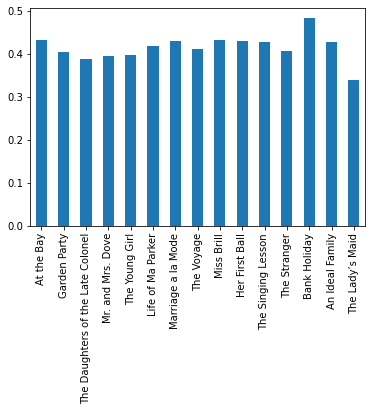

In [244]:
# Insert your code here.
alpha_token_dict = {title: text for title, text in zip(titles, alpha_tokens)}
    
def ttr(tokens):
    tokens = tokens[:1000]
    return len(set(tokens))/len(tokens)

ttr_list = []

for story in alpha_token_dict:
    print(f'{story}: {ttr(alpha_token_dict[story])}')
    ttr_list.append(ttr(alpha_token_dict[story]))
    
ttr_per_story = {title: text for title, text in zip(titles, ttr_list)}

pd.Series(ttr_per_story).plot(kind='bar')

**MY ANSWER:** Wow, I was not expecting the type to token ratio for all of these texts to be so similar to one another. Besides the last short story, "The Lady's Maid," which seems to have much lower of a ratio, and "Bank Holiday," which has the highest ratio, all of the texts seem to have a really similar ttr. I think the reasons for this could be because they are all written by the same author and could have similar themes and genres. After doing question eight, I found it really interesting how "The Bank Holiday" is the story that is the farthest away from all the other stories in this short story collection. It seems that it is the only one that is not really categorized as a romance, but instead somewhere between humor, hobbies, and lore, and so it could have a couple more niche words that increased its ratio. Other than that, basically all the other short stories seem to be romance, so they would likely have similar contents and word choices, which is why their ratios are so similar to one another.

### 5. Show some frequent n-grams for each text in your corpus.
Don't print out too much—just enough to get the idea.

Then, in a markdown cell, write about what you notice about them.

In [245]:
# Insert your code here.
from collections import Counter

def commonFourgrams (tokens): #take the isaplha tokens of each narrator 
    ngrams = nltk.ngrams(tokens, 4)
    ngramsList = list(ngrams)
    return Counter(ngramsList).most_common(7)

print("The 7 most common fourgrams for each of the stories in The Garden Party collection.")
print("")

for story in alpha_token_dict:
    print(story)
    print(commonFourgrams(alpha_token_dict[story]))
    print("")

The 7 most common fourgrams for each of the stories in The Garden Party collection.

At the Bay
[(('in', 'the', 'middle', 'of'), 3), (('of', 'the', 'summer', 'colony'), 3), (('it', 'was', 'as', 'though'), 3), (('kezia', 'the', 'old', 'woman'), 3), (('i', 'do', 'want', 'to'), 3), (('and', 'the', 'paddocks', 'and'), 2), (('the', 'paddocks', 'and', 'bungalows'), 2)]

Garden Party
[(('on', 'the', 'back', 'of'), 3), (('out', 'of', 'the', 'room'), 3), (('the', 'only', 'flowers', 'that'), 2), (('as', 'though', 'they', 'had'), 2), (('slap', 'in', 'the', 'eye'), 2), (('a', 'corner', 'of', 'the'), 2), (('the', 'back', 'of', 'an'), 2)]

The Daughters of the Late Colonel
[(('still', 'very', 'fond', 'of'), 4), (('very', 'fond', 'of', 'meringues'), 4), (('at', 'any', 'rate', 'not'), 3), (('the', 'chest', 'of', 'drawers'), 3), (('his', 'father', 'is', 'still'), 3), (('father', 'is', 'still', 'very'), 3), (('is', 'still', 'very', 'fond'), 3)]

Mr. and Mrs. Dove
[(('the', 'chest', 'of', 'drawers'), 4),

**MY ANSWER:** For this question, I decided to print out the seven most common fourgrams for each of the fifteen short stories in Mansfield's short story collection. Something interesting that I noticed was that for almost all of these stories, even the seventh most common fourgram appears more than once in the story. The only exception to this are the fifth ("The Young Girl") and thirteenth ("Bank Holiday") short stories, which only have the seventh most common fourgram appear once. There are a couple of these fourgrams that seem to just use the same phrase but with one different word, and so it seems that a particular phrase appears throughout a story, and not just those four words. One example of this can be seen in "The Bank Holiday," where it seems that the phrase 'bank holiday a stout man with a pink face wears...' is broken up into a bunch of fourgrams. Another example of this can be seen in "An Ideal Family," where the phrase seems to be 'you an ideal family sir an ideal...'. Something else that I noticed was that there seem to be a lot of verbs such as 'listening' and 'laughed' and 'say', as well as a some descriptive adjectives and a bunch of pronouns.

### 6. Choose a word, or an n-gram, which you think may be significant for your corpus. Make a chart that shows the proportions of that term across all the texts in your corpus.
Make sure to use proportions, and not counts. Then, in the markdown cell, write about what you notice.

In [216]:
# Insert your code here.
def counted(tokens): 
    counted = Counter(tokens)
    return counted 

counts = []
for story in alpha_token_dict: 
    counts.append(counted(alpha_token_dict[story]))

counts_dict = {title: text for title, text in zip(titles, counts)}

table1 = pd.DataFrame(counts_dict).fillna(0)   #this dataframe object takes any kind of data structure that is 2D and tries to make it a dataframe
word_freq = table1/lengths
word_freq['average'] = word_freq.mean(axis=1)
word_freq.sort_values(by="average", ascending=False).head(12)

,At the Bay,Garden Party,The Daughters of the Late Colonel,Mr. and Mrs. Dove,The Young Girl,Life of Ma Parker,Marriage a la Mode,The Voyage,Miss Brill,Her First Ball,The Singing Lesson,The Stranger,Bank Holiday,An Ideal Family,The Lady’s Maid,average
the,0.058370,0.055759,0.034332,0.044640,0.039543,0.053312,0.054839,0.053566,0.057561,0.056388,0.050990,0.056403,0.066109,0.055152,0.039784,0.051783
and,0.033310,0.028648,0.025128,0.036745,0.024297,0.032310,0.031452,0.037109,0.040816,0.031151,0.023267,0.027970,0.038494,0.035058,0.035363,0.032075
a,0.027681,0.023265,0.022060,0.015791,0.026679,0.028675,0.025000,0.032914,0.026688,0.019716,0.024257,0.016875,0.052720,0.017956,0.021611,0.025459
to,0.022207,0.022688,0.028342,0.019435,0.023344,0.025444,0.022849,0.021943,0.017268,0.028391,0.026733,0.027970,0.010879,0.023942,0.027014,0.023230
she,0.016270,0.026149,0.023959,0.020650,0.038113,0.031099,0.015591,0.021620,0.030874,0.018533,0.020792,0.018493,0.004184,0.008551,0.019646,0.020968
was,0.023055,0.016535,0.016801,0.021561,0.015722,0.022213,0.016667,0.019038,0.026164,0.019322,0.007921,0.022885,0.001674,0.018811,0.025049,0.018228
it,0.018968,0.016535,0.021768,0.023990,0.013816,0.014943,0.015054,0.015489,0.020931,0.017744,0.017822,0.013638,0.013389,0.014964,0.026523,0.017705
her,0.015884,0.015574,0.013294,0.020346,0.030014,0.023021,0.007527,0.024847,0.017792,0.023265,0.019802,0.015719,0.007531,0.008123,0.017191,0.017329
of,0.019123,0.014997,0.016070,0.022776,0.010481,0.016155,0.010484,0.016780,0.014652,0.013013,0.017327,0.013176,0.019247,0.014109,0.015717,0.015607
i,0.008867,0.010383,0.012126,0.018828,0.033826,0.005654,0.010484,0.006776,0.001047,0.007886,0.009406,0.012483,0.004184,0.006413,0.058448,0.013787


<AxesSubplot:>

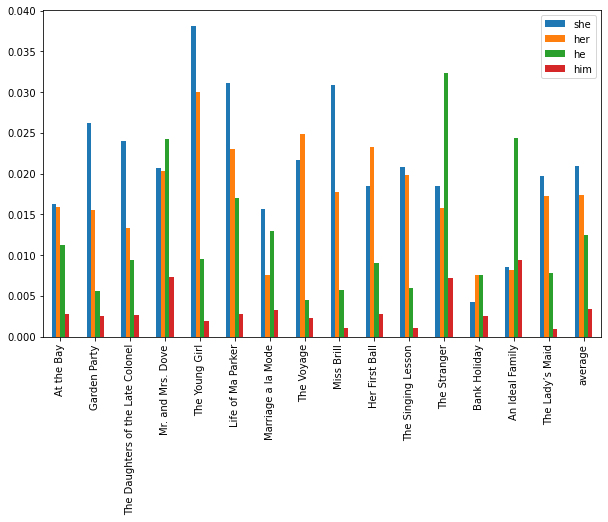

In [250]:
word_freq.loc[['she', 'her', 'he', 'him']].T.plot(kind="bar", figsize = (10,6))  

**MY ANSWER:** So what I tried to do here was find the words (no punctuation included), that had the highest frequencies throughout the whole texts on average. I created a dataframe with all the short stories and all the words, and then created an 'average' column as well and sorted through that column with ascending = False, so that the most frequent words would pop up at the top. You can see the twelve most frequently used words throughout the short story collection above. At first I was trying to weed through all of the conjuctions and pronouns to find maybe a noun or adjective that is really significant in this corpus. However, after seeing how the three pronouns 'he', 'she', 'and her' were all present in the top twelve list, I realized that even these words were probably really important in this corpus, and could tell us a lot about the different short stories and what they focus on. Orginally I was planning on just creating the graph above for the word 'she,' but I thought it could be more fun to compare it to a couple other pronouns to see which of them are the most frequent in each of the stories. I think that it's really interesting how in most of the stories, the female pronoun frequencies are much greater than the male ones (with the exception of "The Stranger" and "An Ideal Family"). This could perhaps give some insight into the focus of the stories, and how heavily they center on their main characters compared to others. I also found it really interesting how the word 'she' is used so much more frequently than the word 'her' in most of these story - it is often the subject of the story instead of the object, which is a really interesting observation. This is even more apparent for the male pronouns, where 'him' is barely used in any of the texts, and much less frequently than 'he,' and this is the case for all fifteen of the stories, which is pretty crazy. 

### 7. Run a comparative stylometric analysis of the texts in your corpus.
So, make document-term matrices for your most frequent words, reduce their dimensions to 2 or 3 using PCA, and make a labeled scatter plot and/or dendrogram of the results.

/Users/saanvi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


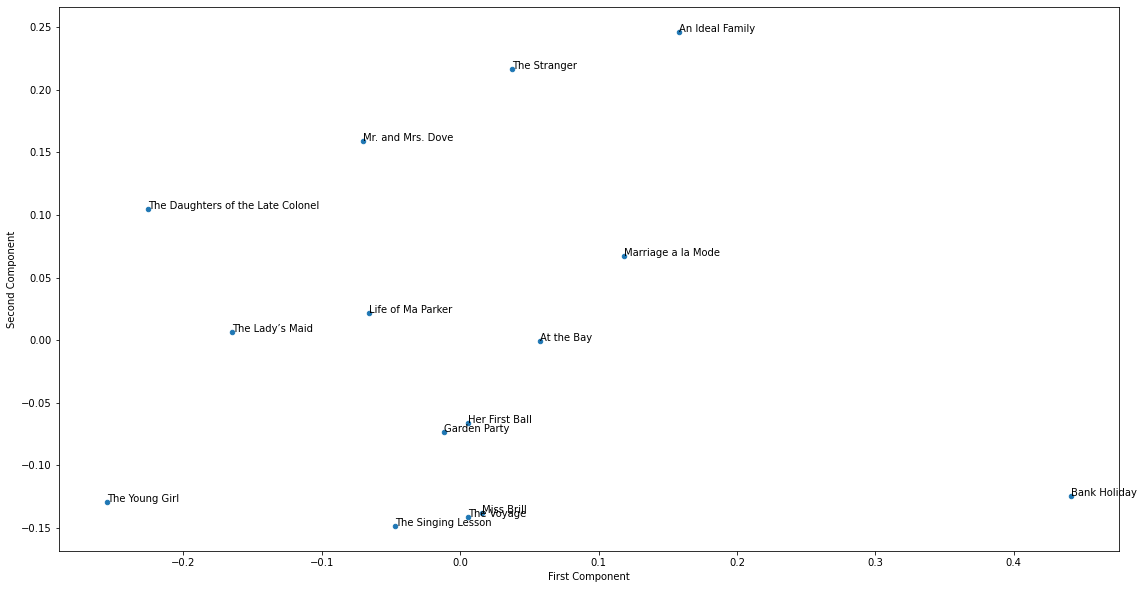

In [218]:
# Insert your code here.
import sklearn 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from nltk.corpus import gutenberg

garden_texts = [at_the_bay, garden_party, daughters_colonel, gardenSplit[30], gardenSplit[31], gardenSplit[32], gardenSplit[33], gardenSplit[34], gardenSplit[35], 
                gardenSplit[36], gardenSplit[37], gardenSplit[38], gardenSplit[39], gardenSplit[40], gardenSplit[41]]

tfidfVectorizer = TfidfVectorizer(max_features=800, use_idf=False)
gardenFreq = tfidfVectorizer.fit_transform(garden_texts).todense()
pd.DataFrame(gardenFreq)

'''gardenWordsNames = tfidfVectorizer.get_feature_names()
gardenDf = pd.DataFrame(gardenFreq, columns = gardenWordsNames, index=titles)
gardenDf'''

pca = PCA(n_components=2)
gardenReduced = pca.fit_transform(gardenFreq)

df = pd.DataFrame(gardenReduced, 
             columns =["First Component", "Second Component"], 
             index = titles) 
ax = df.plot(kind="scatter", x = "First Component", y="Second Component", figsize = (19,10))
for title, points in df.iterrows():
    ax.annotate(title, points) 

**MY ANSWER:** Above I have a graph of all the short stories reduced to two dimensions and plotted so that we can see how they are all grouped together. Immediately we can see how some of the texts group together, such as the cluster with 'Her First Ball' and 'Garden Party,' as well as the trio with 'Miss Brill', 'The Voyage', and 'The Singing Lesson'. Not only are these all similar genres and writting styles, but the specific contents and themes of these stories must be really similar for them to all be grouped like this. For example, after reaidng both 'Her First Ball' and 'Garden Party,' they have these vivid descriptions and young girls at the center of the story, with a kind of coming-of-age feeling  to the stories. I also thought that 'The Young Girl' would have been grouped together with these two, since it also focuses on mental changes in youth and also has many mentions of their surroundings, such as mentions of flowers. I also thought it was really interesting how 'Marriage a la Moda' and especially 'An Ideal Family' are so far away from these two clusters, and are not closer together to each other, since they both involved lots of relationship dynamics between families. I might also add 'The Daughters of the Late Colonel' to this list. Something else that really intrigued me was how 'Bank Holiday' was so far away from all the other short stories. Maybe the next question can offer some insight too this question.

### 8. Add the category texts of the Brown Corpus to your stylometric analysis, and create a new visualization which includes these texts.
Then, write about how your texts compare with the texts of the Brown Corpus, and what you think that means.

/Users/saanvi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


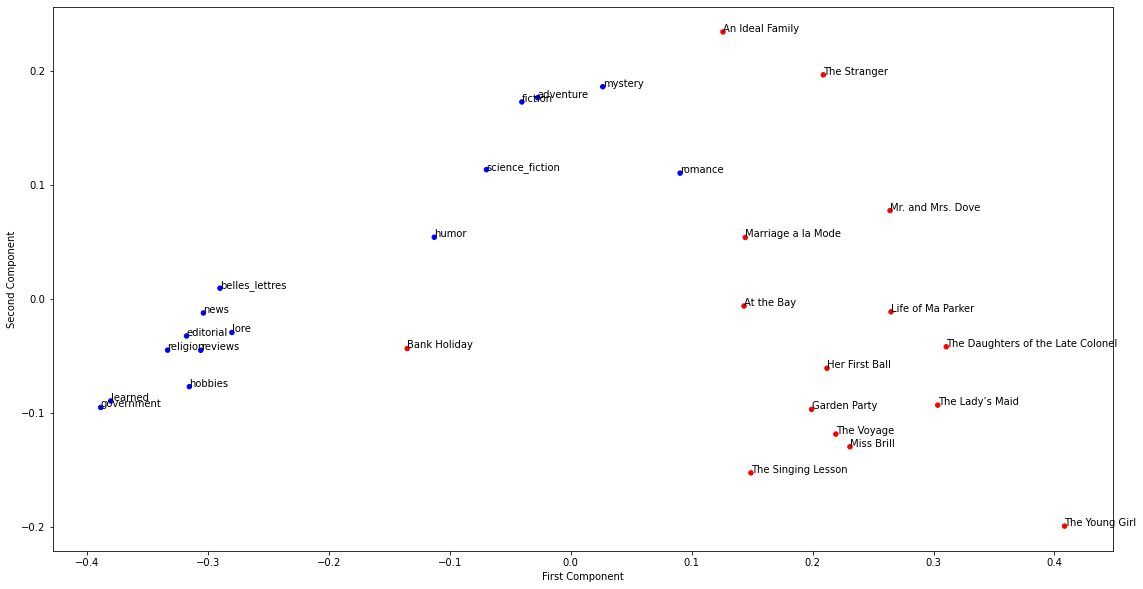

In [219]:
# Insert your code here.
from nltk.corpus import brown
categories = brown.categories()
categoriesDiction = {category: brown.words(categories = [category]) for category in categories}

alpha_token_dict.update(categoriesDiction)
titles2 = []
for thing in alpha_token_dict:
    titles2.append(thing)
    
categories_texts = []
for text in categoriesDiction:
    joinedTokens = ' '.join(categoriesDiction[text])
    categories_texts.append(joinedTokens)

allTexts = garden_texts + categories_texts

tfidfVectorizer = TfidfVectorizer(max_features=400, use_idf=False)
allTextsFreq = tfidfVectorizer.fit_transform(allTexts).todense()
pd.DataFrame(allTextsFreq)

pca = PCA(n_components=2)
allTextsReduced = pca.fit_transform(allTextsFreq)

df = pd.DataFrame(allTextsReduced, 
             columns =["First Component", "Second Component"], 
             index = titles2) 
ax = df.plot(kind="scatter", x = "First Component", y="Second Component", c = list('r'*15 + 'b'*15), figsize = (19,10))
for title, points in df.iterrows():
    ax.annotate(title, points) 

**MY ANSWER:** Okay, so above I have graphed all of the categories from the Brown corpus as well as all of the short stories from *The Garden Party*. Immediately, we can see how there is kind of a divide between the blue dots (which represent the Brown categories), and the red dots (which are for the short stories). The blue dots seem to be mainly on the left and top side of the graph, while the red dots are more on the right lower side. I found it really interesting how the blue point that most of the short stories are closest to is 'romance', with the exception of 'An Ideal Family' (which is also close to mystery), and 'Bank Holiday' (which is really far away from the other texts and is somewhere between hobbies, humor, and lore). These divisions by genre shed some more light onto the question I had in the previous question, which was why 'Bank Holiday' was so far away from the rest of the stories in the previous graph. Maybe we can make the guess that this is due to the fact that it is a completely different genre, and so the style of the book as well as its contents will differ from the rest of the books. It's also important to note that the groups from the previous graph are also somewhat intact, even though the stories don't seem to be as close to each other as before. For example, 'The Voyage' and 'Miss Brill' are really close like before, with 'The Singing Lesson' a little further away like before as well. However, 'Her First Ball' and 'Garden Party' have seperated a bit more on this graph. Something else that I noticed was that 'The Young Girl' has moved from the bottom left side to the bottom right side after the categories got added to the graph.

### 9. Repeat your analysis from #7, only this time, use semantic words rather than syntactic words.
In other words, instead of choosing the top 800 most frequent words, or whatever that number is for your texts, choose all the other words, which will be the content words. You may want to limit your selection to words that are in all documents, e.g., by setting `min_df` to `1.0` in `TfIdfVectorizer`.

You'll want to look through the word frequency lists for your corpus to determine where semantic words start in your ranked list of words (after the thousandth most frequent word, maybe?).

Write about what you found.

/Users/saanvi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


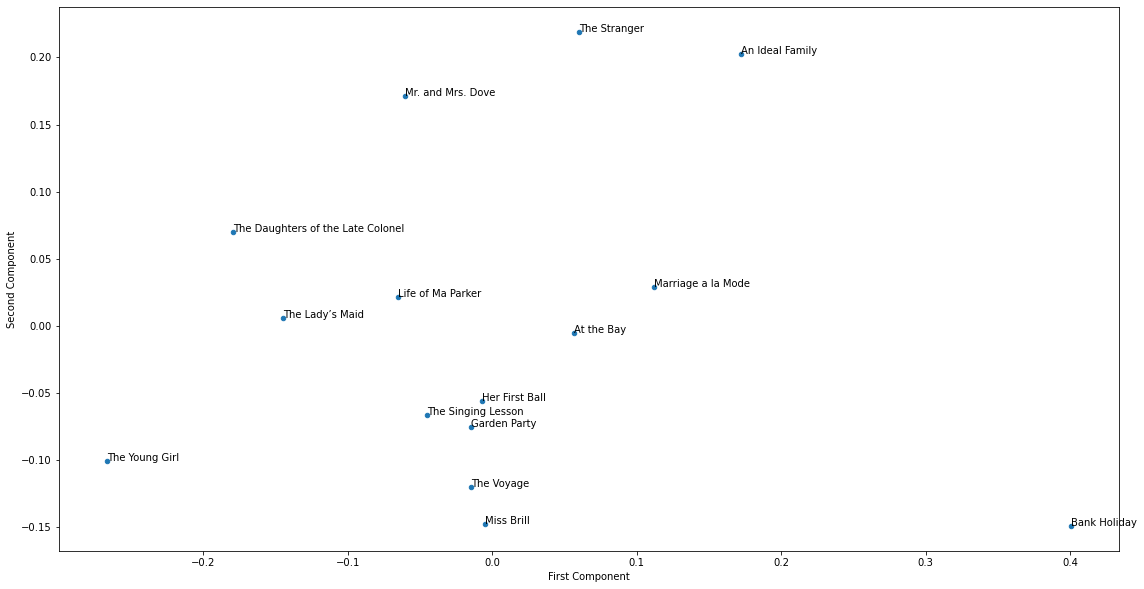

In [220]:
# Insert your code here.
garden_texts = [at_the_bay, garden_party, daughters_colonel, gardenSplit[30], gardenSplit[31], gardenSplit[32], gardenSplit[33], gardenSplit[34], gardenSplit[35], 
                gardenSplit[36], gardenSplit[37], gardenSplit[38], gardenSplit[39], gardenSplit[40], gardenSplit[41]]

tfidfVectorizer = TfidfVectorizer(min_df = 1.0, max_features=100000, use_idf=False)
gardenFreq = tfidfVectorizer.fit_transform(garden_texts).todense()
pd.DataFrame(gardenFreq)

pca = PCA(n_components=2)
gardenReduced = pca.fit_transform(gardenFreq)

df = pd.DataFrame(gardenReduced, 
             columns =["First Component", "Second Component"], 
             index = titles) 
ax = df.plot(kind="scatter", x = "First Component", y="Second Component", figsize = (19,10))
for title, points in df.iterrows():
    ax.annotate(title, points) 

**MY ANSWER:** Unlike the graph from question seven, for this one only uses the words that appear in all of the texts, and does not restrict the maximum amount of features to the top eight hundred most common words, which is why my graph for this question, which analyzes the texts based on semantic words instead of syntactic words, is slightly different. There are a couple similarities to the previous graphs, such as the grouping 'Garden Party' and 'Her First Ball,' but there is also the addition of 'The Singing Lesson' into this group now. I guess that this shows how the contents and words choices, not just the syntax and stylistic structure of the stories, are really similar to one another. The proximity between 'The Voyage' and 'Miss Brill,' which used to be grouped together, has also grown with this new graph. As before 'Bank Holiday' is still laying in the bottom right corner, far away from all of the other texts. 

### 10. Topic-model your corpus using LDA, and create a chart which shows some topics.
Experiment with different parameters until you find the ones that give you the most interpretable results.

In [221]:
# Insert your code here.
from sklearn.decomposition import LatentDirichletAllocation 
from sklearn.feature_extraction.text import CountVectorizer

countVectorizer = CountVectorizer(stop_words = 'english', min_df = 5, max_df = 0.7, vocabulary = wordLabelsNoNums)
gardenCounts = countVectorizer.fit_transform(garden_texts)
wordLabels = countVectorizer.get_feature_names()
wordLabelsNoNums = [wordLabel for wordLabel in wordLabels if wordLabel.isalpha()]
gardenDf = pd.DataFrame(gardenCounts.todense(), index = titles, columns = wordLabelsNoNums).head()  #removed numbs
gardenDf

/Users/saanvi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,absolutely,absurd,accident,affair,afraid,afternoon,ah,ain,air,...,world,wouldn,write,wrong,wyatt,year,years,yellow,yes,young
At the Bay,0,0,1,0,0,1,1,5,0,2,...,1,2,0,6,0,0,5,8,20,4
Garden Party,0,1,4,5,1,1,5,1,0,2,...,0,3,1,1,0,1,0,1,13,5
The Daughters of the Late Colonel,3,2,1,0,0,2,3,1,0,1,...,2,5,0,0,0,3,3,1,8,3
Mr. and Mrs. Dove,2,1,1,0,1,0,3,1,0,0,...,2,0,1,2,0,1,2,1,4,0
The Young Girl,0,1,0,0,1,0,0,0,0,2,...,0,4,0,0,0,1,0,0,2,2


<AxesSubplot:>

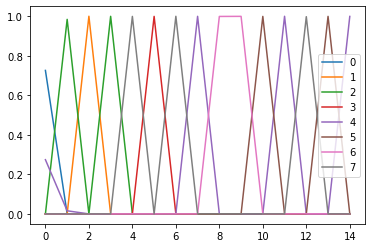

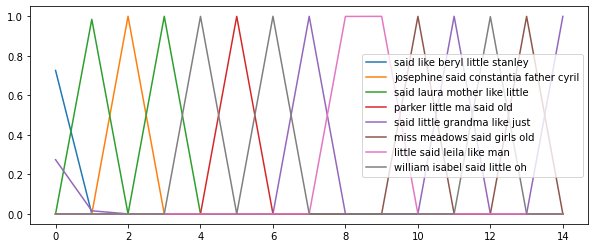

In [248]:
lda = LatentDirichletAllocation(n_components = 8)
ldaOut = lda.fit_transform(gardenCounts)
pd.DataFrame(ldaOut).plot()

topicWordMatrix = pd.DataFrame(lda.components_, index=['Topic ' + str(x) for x in range(8)], columns = wordLabelsNoNums)

def getWords(topicName):
    return ' '.join(list(topicWordMatrix.loc[topicName].sort_values(ascending=False).head(5).index))

topicLabelWords = [getWords(topic) for topic in ['Topic ' + str(x) for x in range(8)]]
pd.DataFrame(ldaOut, columns = topicLabelWords).plot(figsize = (10,4))

**MY ANSWER:** For this question, I decided to create eight different topics and then graph them twice, once without the labels and then one with them there (since the labels kind of block the graph, the one above was just for reference). We can see how every single text (with the exception of the first short story), is related almost perfectly (with a score of basically 1.0) to a certain topic. The first story, which is 'At the Bay' and the longest story, seems to be split between two of the topics. This might be because there is so much text that some parts are similar to the topic in blue, while the rest of the text is similar to the purple topic. Something that I found interesting was that the blue topic is not present in any of the other stories, but just as a part of 'At the Bay.' There are a couple of topics, such as grey and purple, which are tied to multiple stories instead of just one. It's strange how even though the grey topic has two character names present, it is still there for three of the stories, which is something I definately would not have expected. I'm not quite sure what to make of this observation, but it seems that almost all of the topics have the word 'little' in them. Another thing that I noticed was that the orange topic has three characters in the topic label, which is likely why its only tied to one story. For the red and green labels, they both also have a character name, but the red label is only tied to one of the short stories why the green label is tied to two. The pink topic is also like the green one. I think it could be cool to try this with more topics and see if the divide is cleaner than this (even though these results are already really clean, which was pretty surprising).

### Bonus: Make a simple genre categorizer that tries to guess the genre of a text, based on word frequencies derived from the Brown corpus. Test it on all of Mansfield's stories that we've read.
Then, write about why you think your categorizer guessed those genres for these stories.

In [ ]:
# Insert your code here.

Insert your markdown here.